### 🏭 Exploratory Data Analysis (EDA) for Predictive Maintenance (AI4I 2020 Example)

This notebook performs **EDA** (summary statistics, distributions, correlations) and visualizations for a predictive maintenance dataset. It defaults to the **AI4I 2020** dataset format, but will work for any CSV with similar columns.

**How to use:**
1. Place the dataset CSV (e.g., `ai4i2020.csv`) next to this notebook **or** set `DATA_PATH` to the correct file path.
2. Run the cells from top to bottom.

In [1]:
# 🔧 Setup: imports & config (matplotlib only for plots; no seaborn per guidance)
import os
import sys
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

%matplotlib inline

DATA_PATH = Path('datasets/ai4i2020.csv')  # e.g., AI4I 2020 dataset CSV
RANDOM_STATE = 42


#### ⬇️ (Optional) Download via Kaggle API
If you don't already have the CSV locally, you can download a Kaggle-hosted copy (republish) of **AI4I 2020**. 

**Steps:**
1. Create a Kaggle account and obtain an API token (`kaggle.json`).
2. Place `kaggle.json` under `~/.kaggle/` (Linux/Mac) or `%HOMEPATH%\\.kaggle\` (Windows).
3. Uncomment and run the cell below.


In [2]:
# %% Optional Kaggle download (uncomment to use)
# !pip install kaggle --quiet
# import os
# os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
# # Ensure you have placed kaggle.json there before running the next line
# !kaggle datasets download -d stephanmatzka/predictive-maintenance-dataset-ai4i-2020 -p ./ --unzip
# # Set the path if filename differs
# DATA_PATH = Path('ai4i2020.csv')


#### 📥 Load Data
This will read the CSV into a pandas DataFrame. If your filename is different, update `DATA_PATH` above.

In [3]:
if not DATA_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {DATA_PATH}. Place your dataset CSV next to this notebook or update DATA_PATH.")

df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
df.head()


Shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### 🧭 Quick Data Overview
- Column schema & types
- Missing values
- Basic descriptive statistics


In [4]:
print('\nDTypes:')
print(df.dtypes)

print('\nMissing values per column:')
print(df.isna().sum())

print('\nDescriptive statistics (numeric):')
display(df.describe())

print('\nCategorical columns overview:')
for col in df.select_dtypes(include=['object', 'category']).columns:
    nunique = df[col].nunique()
    print(f"- {col} (unique: {nunique})")
    if nunique <= 20:
        print(df[col].value_counts(dropna=False).head(20))
        print('-' * 40)


DTypes:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

Missing values per column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Descriptive statistics (numeric):


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000



Categorical columns overview:
- Product ID (unique: 10000)
- Type (unique: 3)
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
----------------------------------------


#### 🔎 Target & Label Inspection (if available)
For AI4I 2020, typical target columns include `Machine failure` and specific failure modes like `TWF`, `HDF`, `PWF`, `OSF`, `RNF`. Adjust the names below if your dataset differs.

Detected target column: Machine failure

Class distribution:
Machine failure
0    9661
1     339
Name: count, dtype: int64


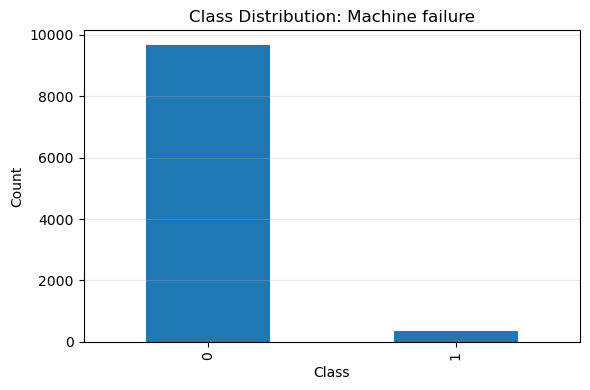

In [5]:
possible_targets = [
    'Machine failure', 'machine_failure', 'Failure', 'failure',
    'mf', 'y', 'target'
]
target_col = None
for cand in possible_targets:
    if cand in df.columns:
        target_col = cand
        break
print('Detected target column:', target_col)

if target_col is not None:
    print('\nClass distribution:')
    print(df[target_col].value_counts(dropna=False))

    counts = df[target_col].value_counts(dropna=False)
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar')
    plt.title(f'Class Distribution: {target_col}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#### 📊 Distributions of Key Numeric Features
Histograms and boxplots for selected numeric columns. Modify `numeric_cols` for your dataset.

Numeric columns: ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


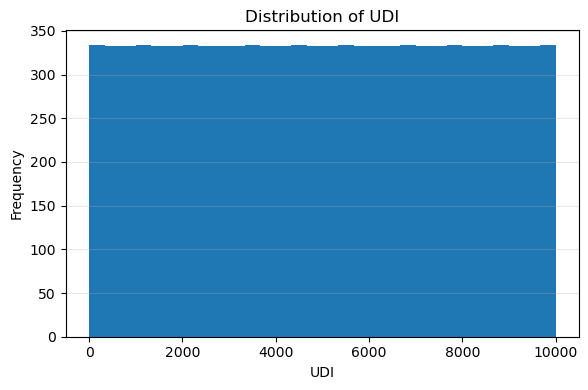

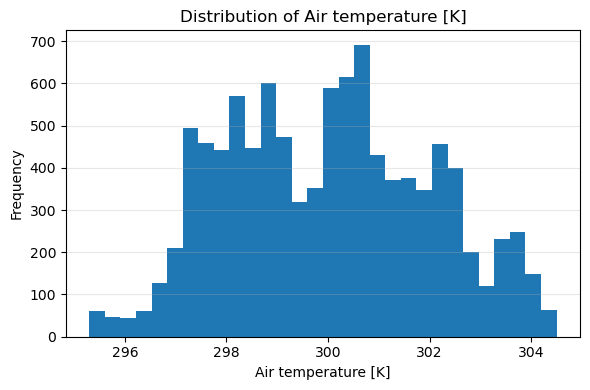

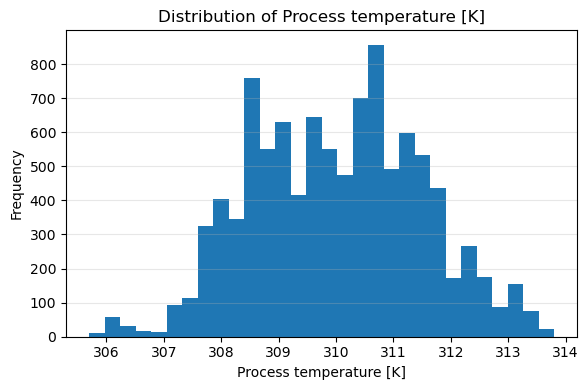

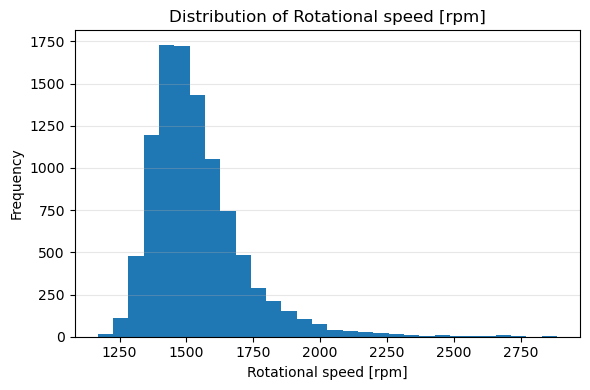

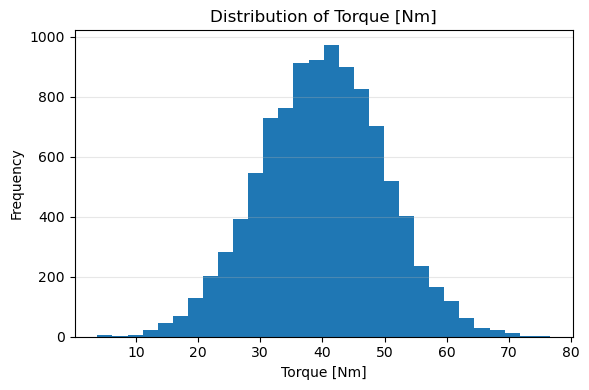

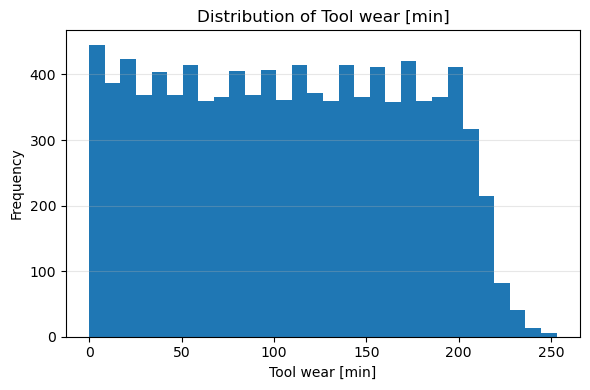

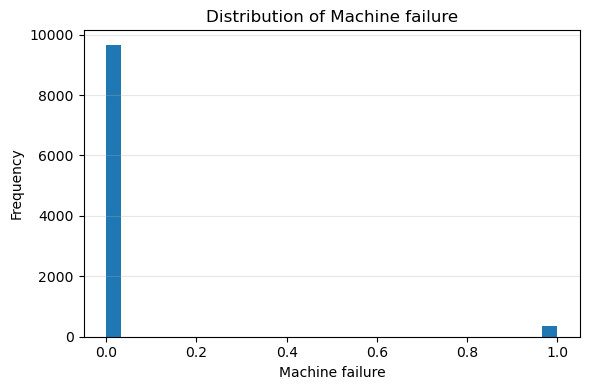

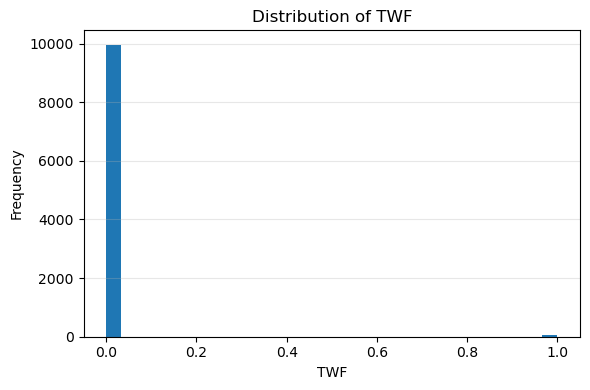

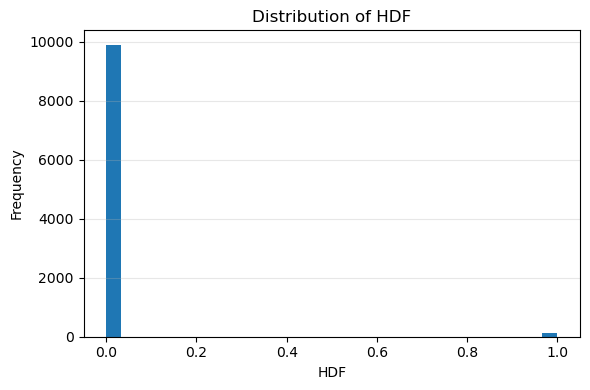

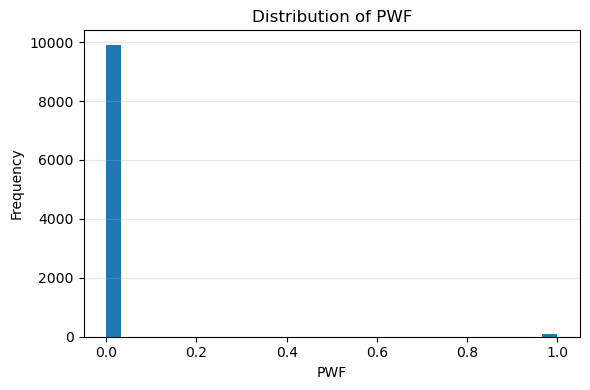

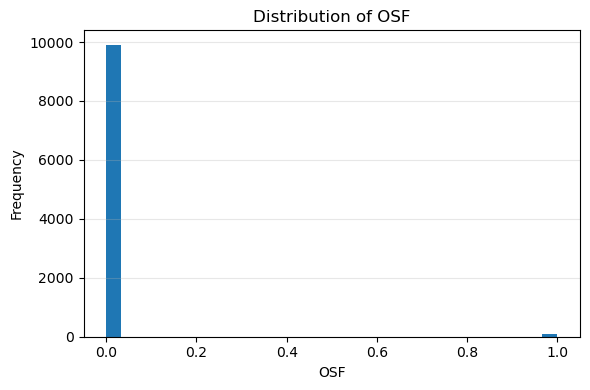

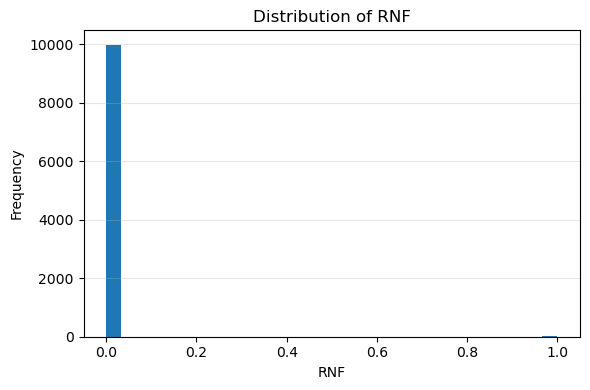

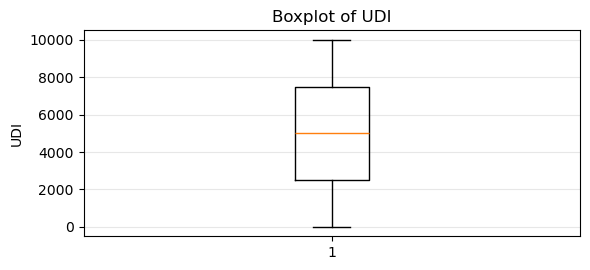

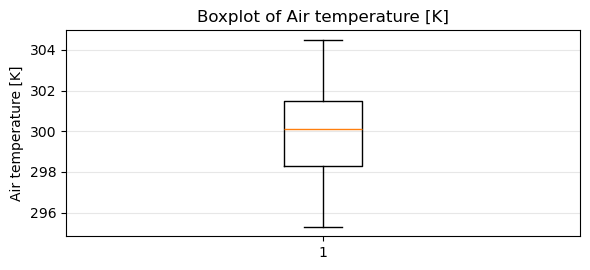

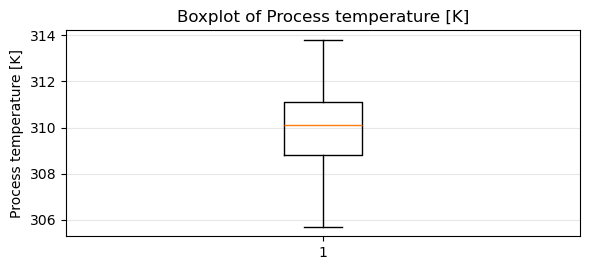

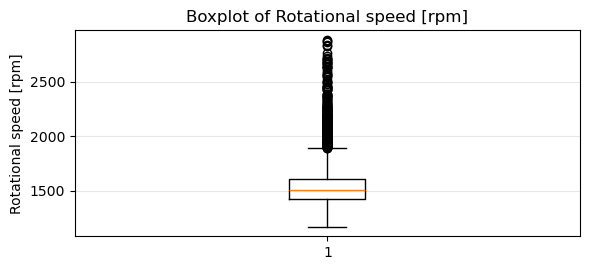

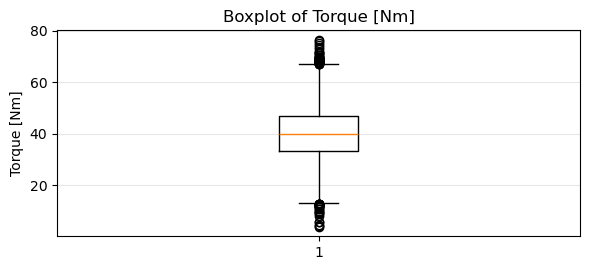

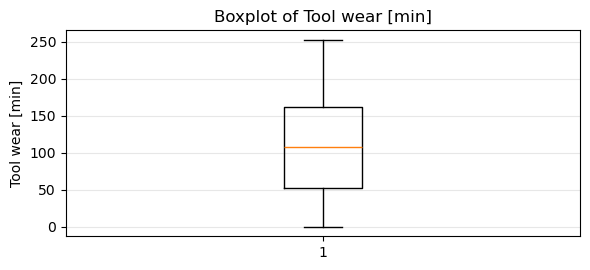

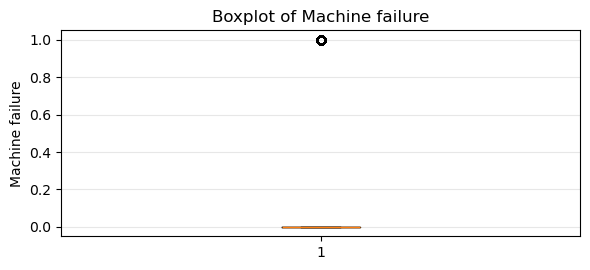

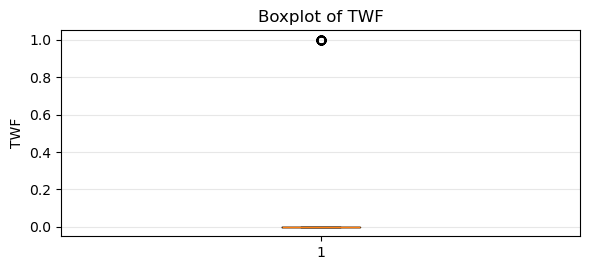

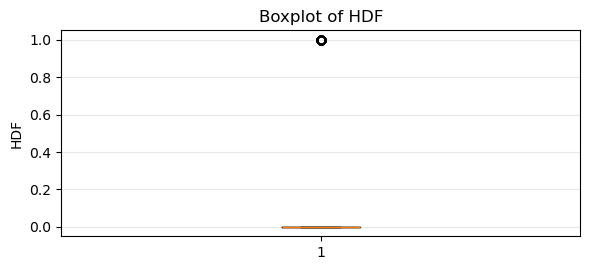

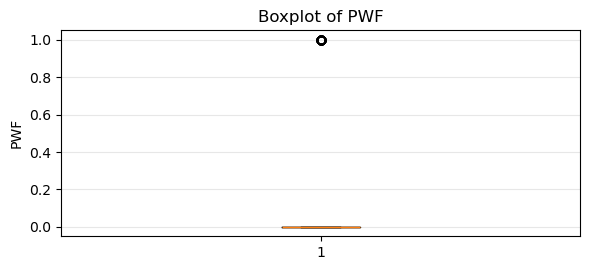

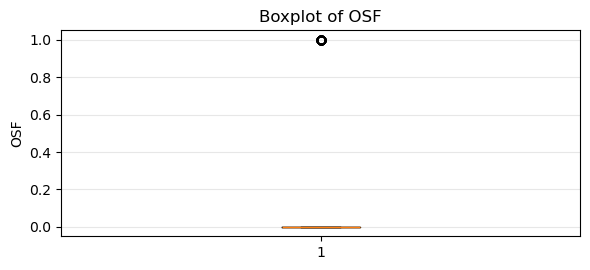

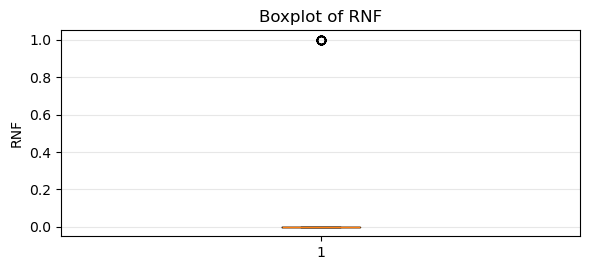

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,2.8))
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#### 🔗 Correlation Analysis
Compute Pearson correlations for numeric variables and visualize a heatmap using matplotlib.

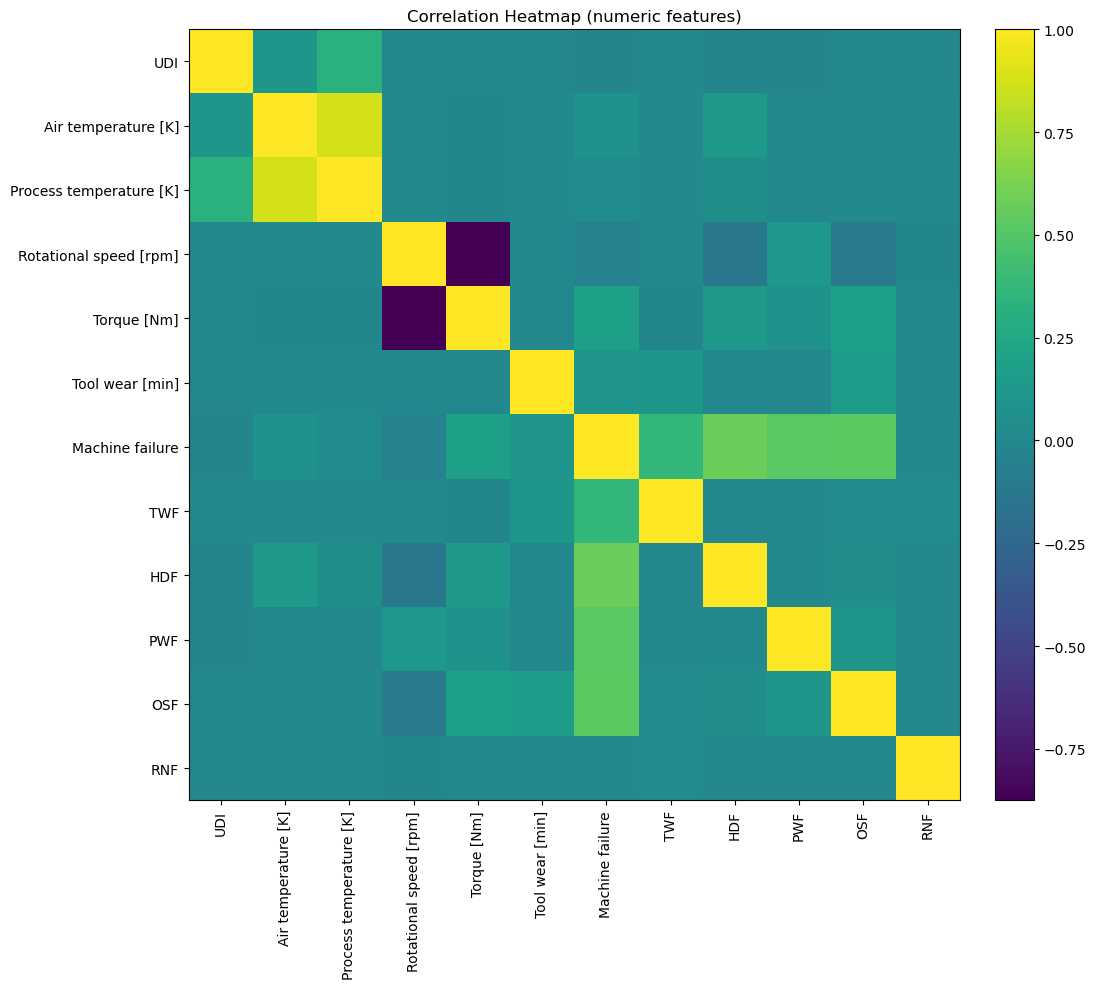

Top absolute correlations with Machine failure:
Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]     0.044188
Process temperature [K]    0.035946
Name: Machine failure, dtype: float64


In [7]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    plt.figure(figsize=(min(12, 0.6*len(numeric_cols)+4), min(10, 0.6*len(numeric_cols)+3)))
    im = plt.imshow(corr.values, interpolation='nearest')
    plt.title('Correlation Heatmap (numeric features)')
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
    
    if 'Machine failure' in corr.columns:
        print('Top absolute correlations with Machine failure:')
        print(corr['Machine failure'].abs().sort_values(ascending=False).head(10))

#### 🧩 Feature Interactions (Optional)

In [8]:
pairs_to_plot = []
for xcol, ycol in pairs_to_plot:
    if xcol in df.columns and ycol in df.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(df[xcol], df[ycol], alpha=0.4)
        plt.title(f'{xcol} vs {ycol}')
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

#### 🧹 Data Quality Checks

In [9]:
dup_count = df.duplicated().sum()
print(f'Duplicate rows: {dup_count}')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_counts = {}
for col in numeric_cols:
    series = df[col]
    zs = (series - series.mean()) / series.std(ddof=0)
    outlier_counts[col] = int((np.abs(zs) > 3).sum())
print('Outlier counts (|z|>3):')
print(outlier_counts)

Duplicate rows: 0
Outlier counts (|z|>3):
{'UDI': 0, 'Air temperature [K]': 0, 'Process temperature [K]': 0, 'Rotational speed [rpm]': 164, 'Torque [Nm]': 25, 'Tool wear [min]': 0, 'Machine failure': 339, 'TWF': 46, 'HDF': 115, 'PWF': 95, 'OSF': 98, 'RNF': 19}


#### ✅ Wrap-up
You now have a quick **Exploratory Data Analysis (EDA))** baseline:
- Summary statistics & missing values
- Distributions & boxplots
- Correlation heatmap
- Target distribution & simple interactions
